In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_classifier = pd.read_pickle('../../../data/data_tables/df_cell_types.pkl')

In [4]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_cluster.pkl')
df_neuron = df_neuron[~df_neuron.assigned_layer.isna()]

In [7]:
df_classifier = df_classifier[df_classifier['cell_type_coarse'] == 'exc']

In [8]:
len(df_classifier)

922

In [9]:
df_merge = pd.merge(
    df_neuron,
    df_classifier[['segment_id', 'split_index', 'cell_type']],
    on=['segment_id', 'split_index'],
    how='left',
)

In [10]:
labels = ['23P', '4P', '5P-NP', '5P-PT', '5P-IT', '6P-CT', '6P-IT', 'None']

In [11]:
color_dict = dict(
    {
        '23P': 'goldenrod',
        '4P': 'steelblue',
        '5P-IT': 'indianred',
        '5P-PT': 'purple',
        '5P-NP': 'darkred',
        '6P-CT': 'teal',
        '6P-IT': 'darkgreen',
        'None': 'grey',
    }
)

In [12]:
df_merge['cell_type'] = df_merge['cell_type'].replace(to_replace=np.nan, value='None')

In [13]:
df_merge.cell_type = df_merge.cell_type.astype('category')
df_merge.cell_type = df_merge.cell_type.cat.set_categories(labels[::-1])
df_merge = df_merge.sort_values(['cell_type'])

In [14]:
alphas = [1 if c in labels[:-1] else 0.2 for c in df_merge['cell_type']]

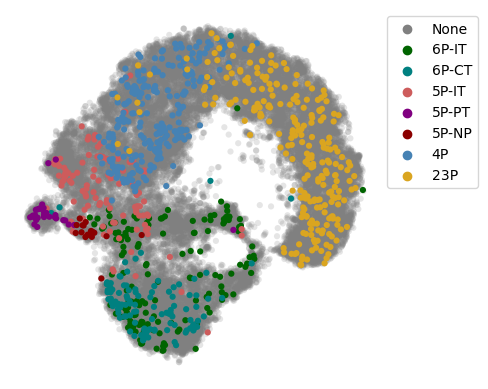

In [15]:
fig, ax = plt.subplots(1, 1)

sns.scatterplot(
    data=df_merge,
    x='tsne_latent_emb_x_all',
    y='tsne_latent_emb_y_all',
    hue='cell_type',
    ax=ax,
    palette=color_dict,
    alpha=alphas,
    linewidth=0,
    rasterized=True,
    s=20,
)

ax.axis('off')
ax.set_aspect('equal')

plt.legend(title='', bbox_to_anchor=(1, 1));
# fig.savefig('figures/dist_celltype_tsne_rast.pdf', bbox_inches='tight', transparent=True, dpi=300)